In [1]:
# For data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression example

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

In [2]:
# Load the dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
# Get input, output, and their names
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names

In [4]:
# First 5 data points
df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# Only one feature
bmi = X[:, np.newaxis, 2]

Text(0, 0.5, 'disease progression')

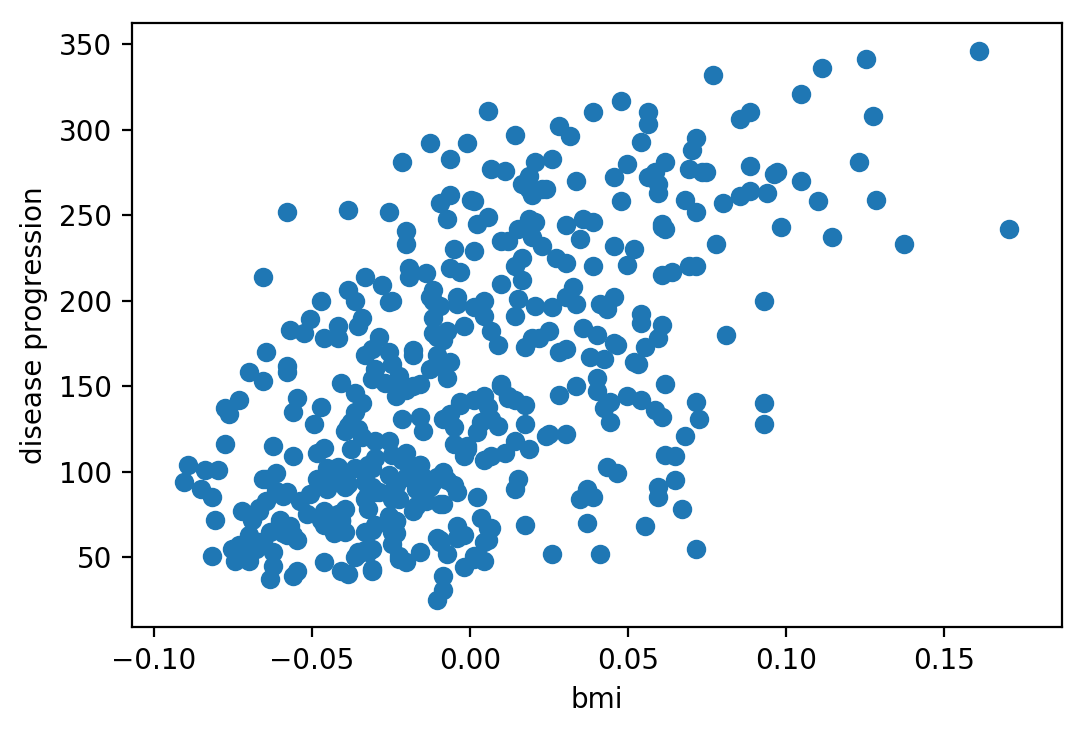

In [6]:
# Plot bmi vs. target variable
plt.figure(dpi=200)
plt.scatter(bmi, y)
plt.xlabel('bmi')
plt.ylabel('disease progression')

In [7]:
# Split the dataset into train and test

X_train = bmi[:300]
y_train = y[:300]

X_test = bmi[300:]
y_test = y[300:]

In [8]:
# Sanity check the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 1), (300,), (142, 1), (142,))

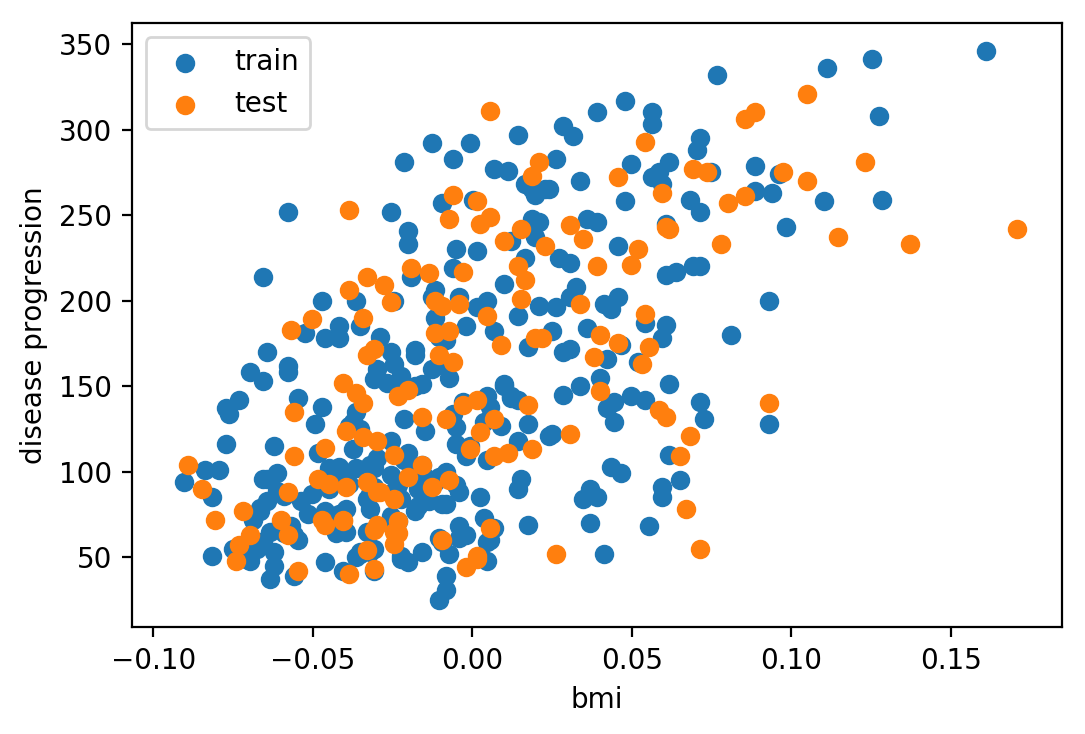

In [9]:
# Plot train and test
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

In [10]:
# Call the linear regression object
from sklearn import linear_model
model1 = linear_model.LinearRegression()

In [11]:
# LEARN = .fit(input, target)
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Get predictions for the test set
preds = model1.predict(X_test)

In [13]:
# Check predictions vs. labels for the first 10 data points
preds[:10], y_test[:10]

(array([222.78610979, 127.10097299, 183.88116406, 184.93264908,
        113.43166773, 112.38018271, 149.1821584 , 120.79206287,
        106.07127259, 152.33661346]),
 array([275.,  65., 198., 236., 253., 124.,  44., 172., 114., 142.]))

In [14]:
# Quantify the error
preds[:10] - y_test[:10]

array([ -52.21389021,   62.10097299,  -14.11883594,  -51.06735092,
       -139.56833227,  -11.61981729,  105.1821584 ,  -51.20793713,
         -7.92872741,   10.33661346])

In [15]:
# Use absolute values to avoid positive/negative errors canceling each other
abs(preds[:10] - y_test[:10])

array([ 52.21389021,  62.10097299,  14.11883594,  51.06735092,
       139.56833227,  11.61981729, 105.1821584 ,  51.20793713,
         7.92872741,  10.33661346])

In [16]:
# Find the mean abs error
np.mean(abs(preds[:10] - y_test[:10]))

50.53446360349993

In [17]:
# Find the mean abs error, for all test data
np.mean(abs(preds - y_test))

50.59683538302396

In [18]:
# This and many other metrics are available in sklearn
from sklearn import metrics
metrics.mean_absolute_error(y_test, preds)

50.59683538302396

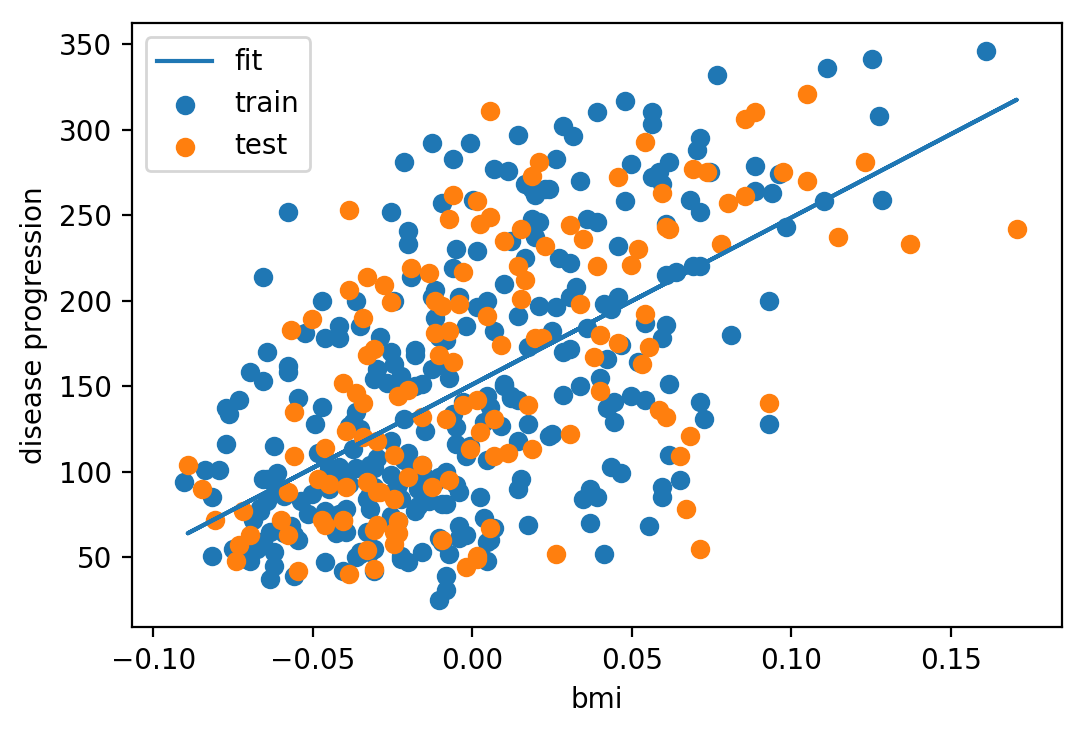

In [19]:
# Plot train/test data with fit
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.plot(X_test, model1.predict(X_test), label='fit')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

# Deep learning example

In [20]:
# Download the MNIST ataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Label:  3


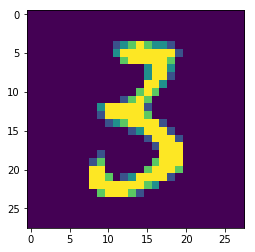

In [21]:
# Random digit from the training set.
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
print('Label: ', y_train[index])

In [22]:
# Build the architecture
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Activation, Dense

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3), strides=2, padding='same'))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [23]:
# Set the optimizer and the loss
from keras.optimizers import Adam, SGD
opt = SGD(lr=0.001)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Put data into suitable shape
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [25]:
# Train and test
H = model2.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 55s 914us/step - loss: 0.1129 - acc: 0.9703 - val_loss: 0.0459 - val_acc: 0.9850


Label: 7
Prediction:  7


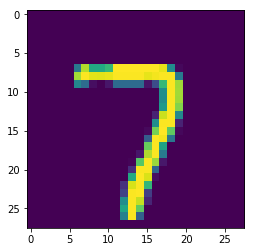

In [26]:
# Random image from the test set
index = np.random.randint(0, 10000)
random_image = x_test[np.newaxis, index]
plt.imshow(random_image.reshape(28, 28))
print('Label:', np.argmax(y_test[index]))
print('Prediction: ', np.argmax(model2.predict(random_image)))  # model.predict(image)

# Challenge 1

In [27]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

- Repeat the example: predict disease progression from bmi

- Check errors with different metrics e.g. mean squared error (mse)
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Compare mse with mae

- Find the intercept and slope using sklearn.linear_model.LinearRegression attributes
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Instead of bmi only, use more features and fit again, check if the performance improves

- Use other algorithms e.g. Random Forests

## Solution

In [28]:
# Get input, output, and their names
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names

In [29]:
# Split the dataset into train and test

X_train = X[:300]
y_train = y[:300]

X_test = X[300:]
y_test = y[300:]

In [30]:
# Call the linear regression object
from sklearn import linear_model
model_with_all_features = linear_model.LinearRegression()

In [31]:
model_with_all_features.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
preds = model_with_all_features.predict(X_test)

In [33]:
# This and many other metrics are available in sklearn
from sklearn import metrics
metrics.mean_absolute_error(y_test, preds)

41.203686659690995

In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train, y_train)
preds_rf = random_forest_model.predict(X_test)
metrics.mean_absolute_error(y_test, preds_rf)

46.83577464788732

# Data = Signal + Noise

- Data generation
    - Signal
    - Noise
    - Signal + Noise

In [35]:
# Newton's second law as signal

m = 2  # kg
F = 10  # N

a = F/m  # m/s2

# a = intercept + slope * F

a

5.0

In [36]:
# 10 random F's between 0 and 1
F = np.random.rand(10, 1)
F

array([[0.00320953],
       [0.98168555],
       [0.52468351],
       [0.88457594],
       [0.489146  ],
       [0.10142757],
       [0.35903498],
       [0.72056172],
       [0.57869117],
       [0.97673511]])

In [37]:
# 10 random F's between 0 and 100
F = np.random.rand(10, 1)*100
F

array([[69.60395532],
       [75.4727711 ],
       [69.50059148],
       [30.30562335],
       [77.05942464],
       [17.62976192],
       [74.53654858],
       [23.19050145],
       [46.67258979],
       [82.65048362]])

In [38]:
# Calculate a using Newton's second law
a = F/m
a

array([[34.80197766],
       [37.73638555],
       [34.75029574],
       [15.15281167],
       [38.52971232],
       [ 8.81488096],
       [37.26827429],
       [11.59525073],
       [23.33629489],
       [41.32524181]])

Text(0, 0.5, 'a (m/s2)')

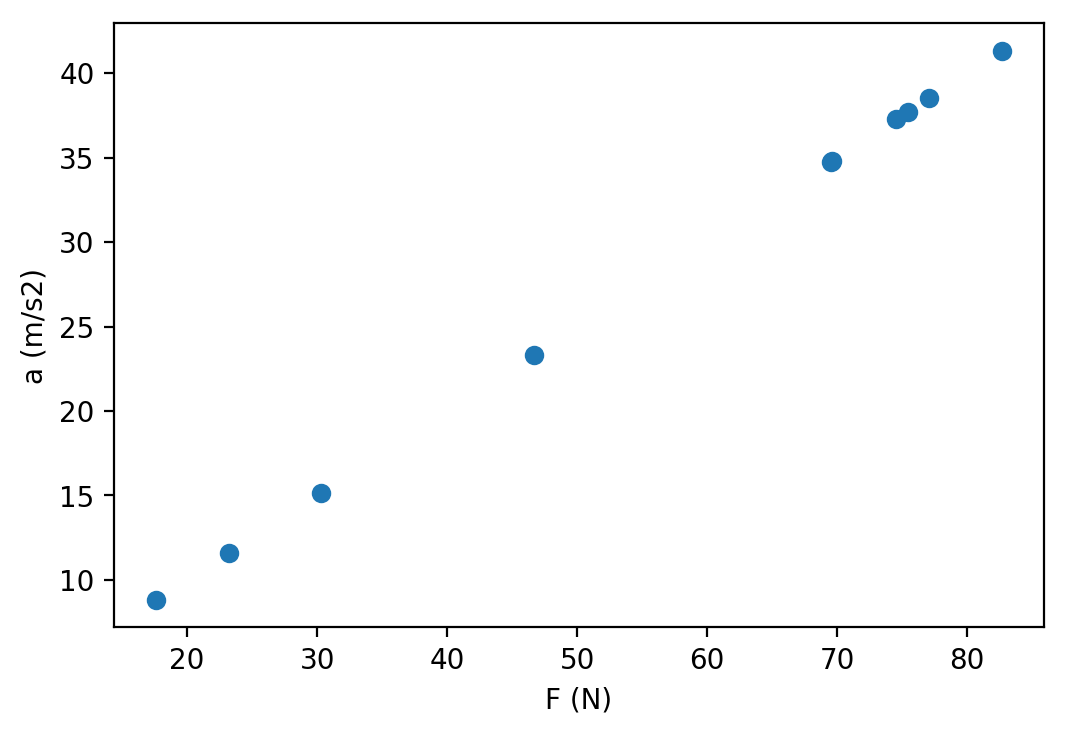

In [39]:
# Plot F vs. a
plt.figure(dpi=200)
plt.scatter(F, a)
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')

Text(0, 0.5, 'a (m/s2)')

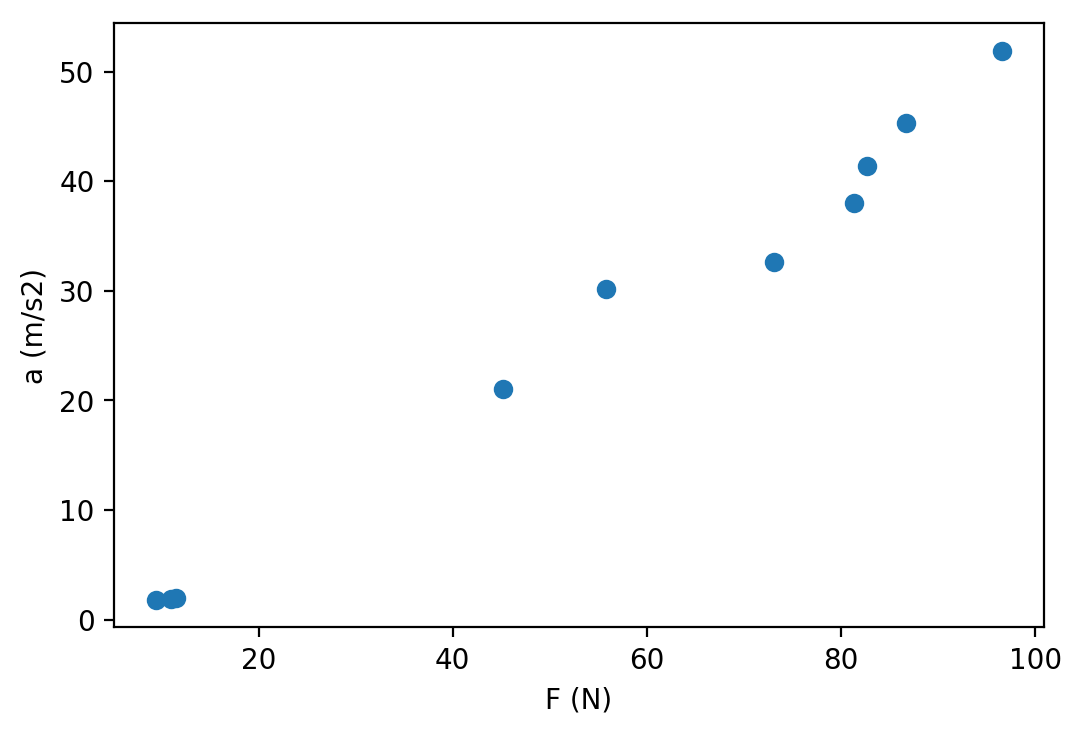

In [40]:
# Let's add noise to the signal
m = 2  # kg
F = np.random.rand(10, 1) * 100  # N
noise = np.random.rand(10, 1) * 10 - 5
a = F/m + noise  # m/s2

# Plot F vs. a
plt.figure(dpi=200)
plt.scatter(F, a)
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')

**Data = Signal + Noise**

a = F/m + noise

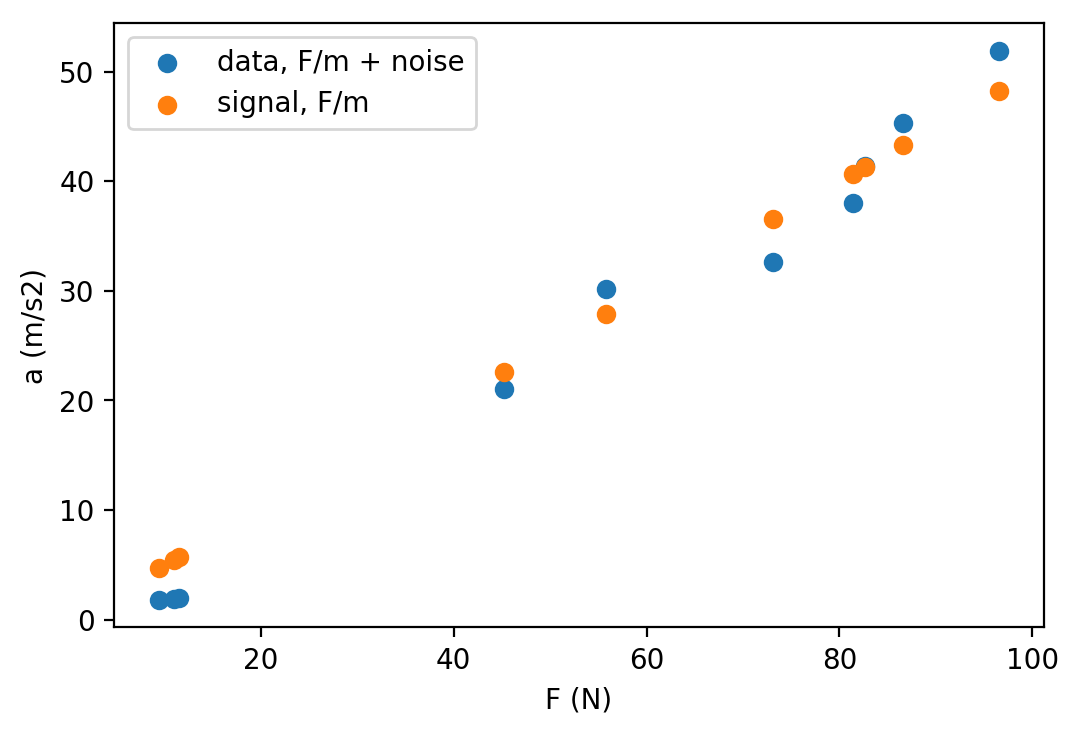

In [41]:
# Signal vs. Data
plt.figure(dpi=200)
plt.scatter(F, a, label='data, F/m + noise')
plt.scatter(F, F/m, label='signal, F/m')
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

Text(0.5, 1.0, 'Data = Signal + Noise')

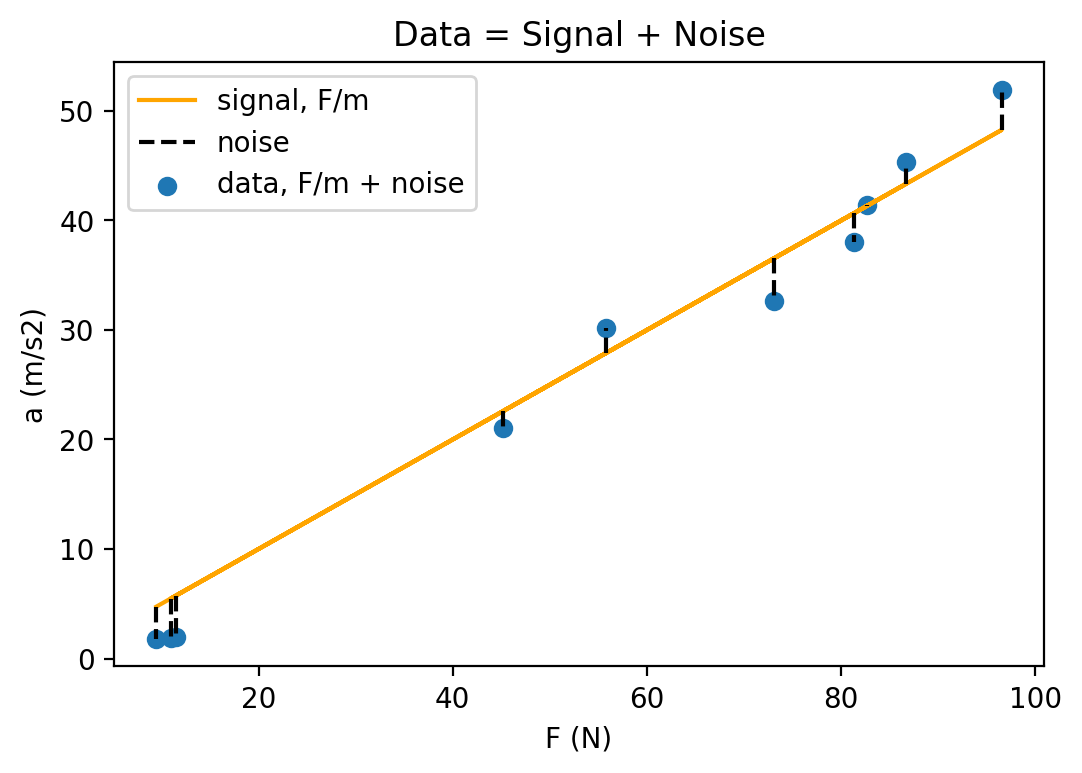

In [42]:
# Data = Signal + Noise
plt.figure(dpi=200)
plt.scatter(F, a, label='data, F/m + noise')
plt.plot(F, F/m, label='signal, F/m', color='orange')

for i in range(len(F)):
    plt.plot([F[i], F[i]], [F[i]/m, a[i]], 'k--', label='noise' if i == 0 else None)

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()
plt.title('Data = Signal + Noise')

**The aim of machine learning is to find the signal**

In [43]:
# We know the signal, let's see if ML can find it
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(F, a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

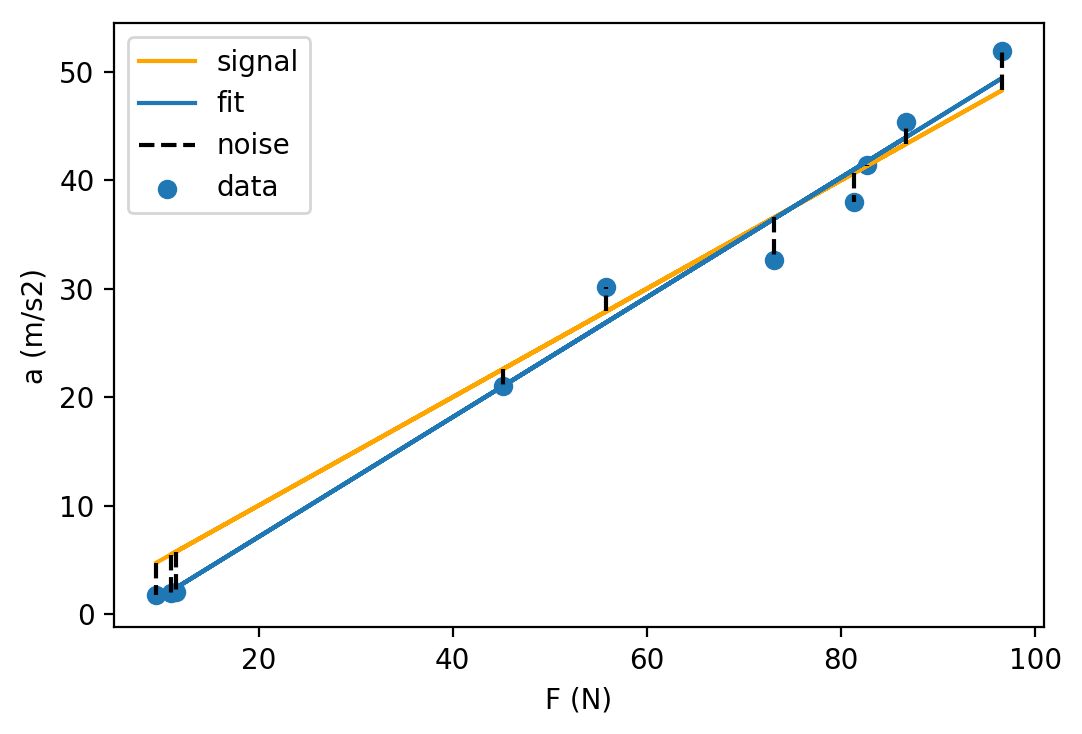

In [44]:
# Signal vs. Fit
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='fit')

for i in range(len(F)):
    plt.plot([F[i], F[i]], [F[i]/m, a[i]], 'k--', label='noise' if i == 0 else None)

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

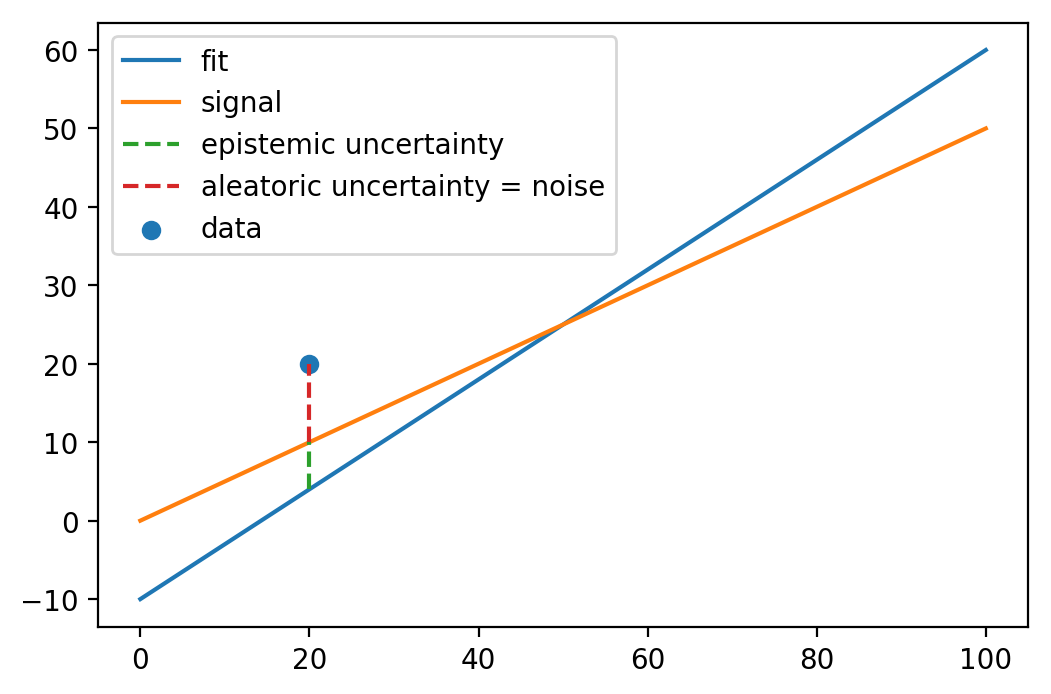

In [45]:
# Aleatoric vs. Epistemic uncertainty
plt.figure(dpi=200)
plt.plot([0, 100], [-10, 60], label='fit')
plt.plot([0, 100], [0, 50], label='signal')
plt.scatter([20], [20], label='data')
plt.plot([20, 20], [4, 10], '--', label='epistemic uncertainty')
plt.plot([20, 20], [10, 20], '--', label='aleatoric uncertainty = noise')
plt.legend()

# Challenge 2

- Plot how epistemic and aleatoric uncertainity will change wrt the number of data. (fixed noise)
- Plot how epistemic and aleatoric uncertainity will change wrt the noise. (fixed number of data)
- Make an educated guess before plotting.

## Solution

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
def data_generator(num_of_data, noise_level):
    m = 2  # kg
    F = np.random.rand(num_of_data, 1) * 100  # N
    noise = np.random.rand(num_of_data, 1) * noise_level - noise_level/2
    a = F/m + noise  # m/s2
    return F, a

In [48]:
def error_vs_numdata(noise_level):
    m = 2  # kg
    F_train, a_train = data_generator(30, noise_level)
    F_test, a_test = data_generator(100, noise_level)

    epis_ls = []
    alea_ls = []
    mae_ls = []

    for i in np.arange(2, 30):
        linear_model = LinearRegression()
        linear_model.fit(F_train[:i], a_train[:i])
        preds = linear_model.predict(F_test)
        mae = np.mean(abs(preds - a_test))
        mae_ls.append(mae)
        epis_unc = np.mean(abs(F_test/m - preds))
        alea_unc = np.mean(abs(F_test/m - a_test))
        epis_ls.append(epis_unc)
        alea_ls.append(alea_unc)

    plt.figure(dpi=100)
    plt.plot(epis_ls, label='Epistemic')
    plt.plot(alea_ls, label='Aleatoric')
    plt.plot(mae_ls, '--', label='Test error')
    plt.ylabel('MAE')
    plt.ylim(0, 20)
    plt.xlabel('num_training_data')
    plt.title('Noise level = ' + str(noise_level))
    plt.legend()

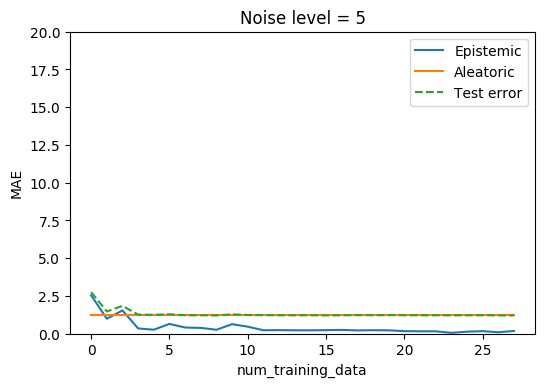

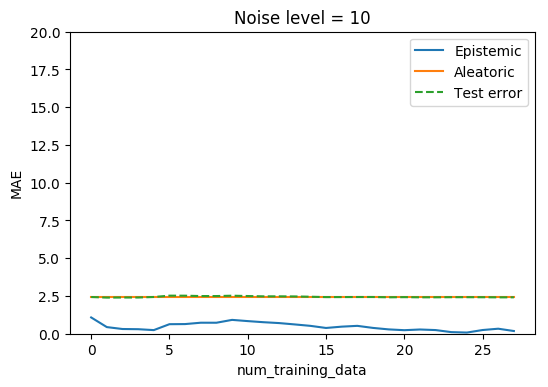

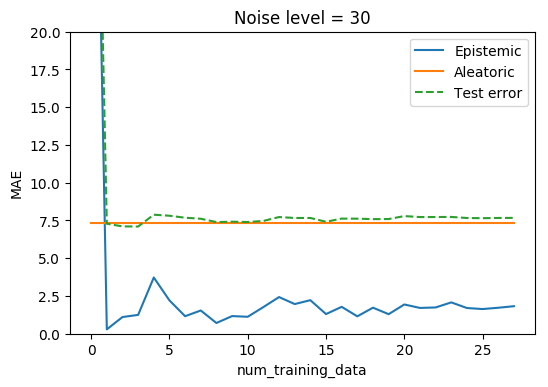

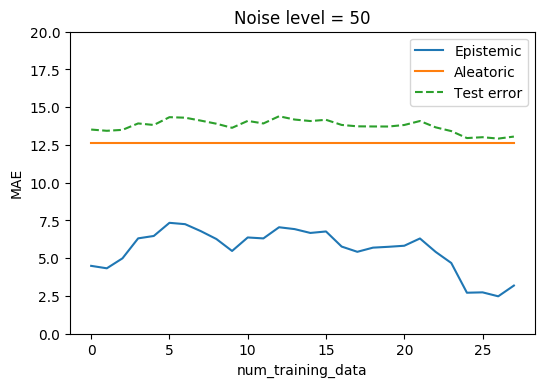

In [49]:
error_vs_numdata(noise_level=5)
error_vs_numdata(noise_level=10)
error_vs_numdata(noise_level=30)
error_vs_numdata(noise_level=50)

Model performance depends on epistemic and aleatoric uncertainty. The best performance a model can reach is limited by aleatoric uncertainty. Building better models can improve the performance by decreasing epistemic uncertainty, until you hit the limit set by aleatoric uncertainty.

- You can decrease epistemic uncertainty by:
    - Increasing model capacity until you are not underfitting
    - Getting more data if you have enough model capacity
    - Hyper-parameter tuning, model selection etc.
- You can decrease aleatoric uncertainty by:
    - Improving the quality of data collection (e.g. higher resolution)
    - Adding relevant features

# Overfitting

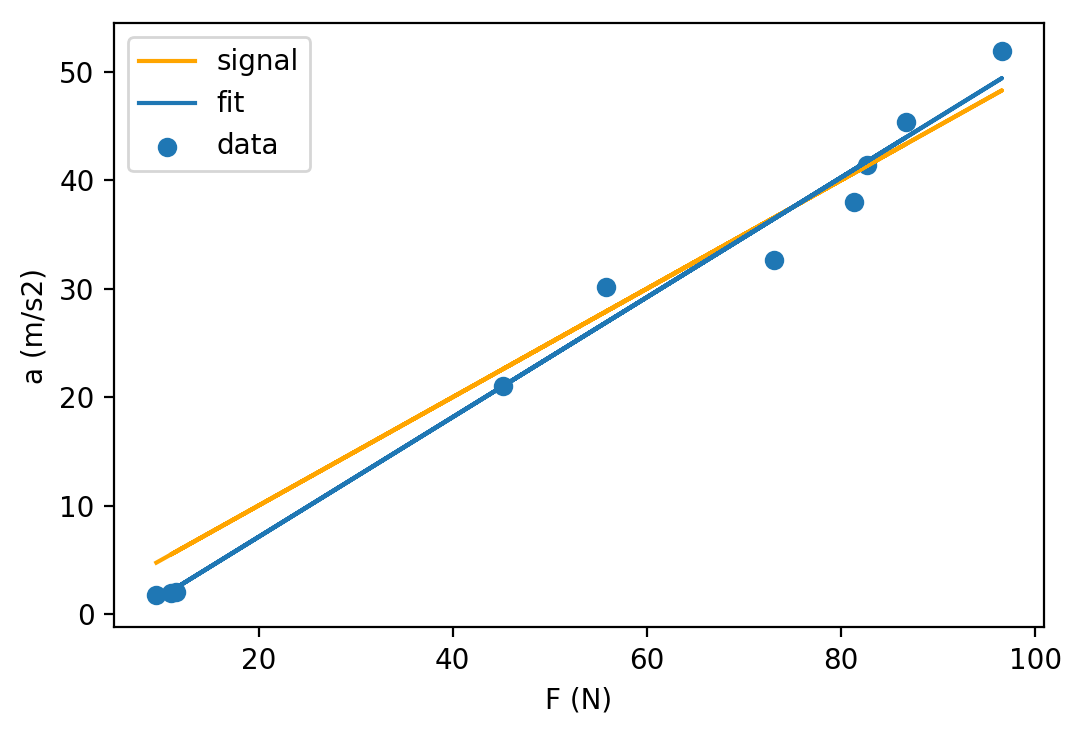

In [50]:
# Plot again the prev. data
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='fit')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

In [51]:
# Fit a degree 5 polynomial to F and a
z = np.poly1d(np.polyfit(F.reshape(-1), a.reshape(-1), 5))

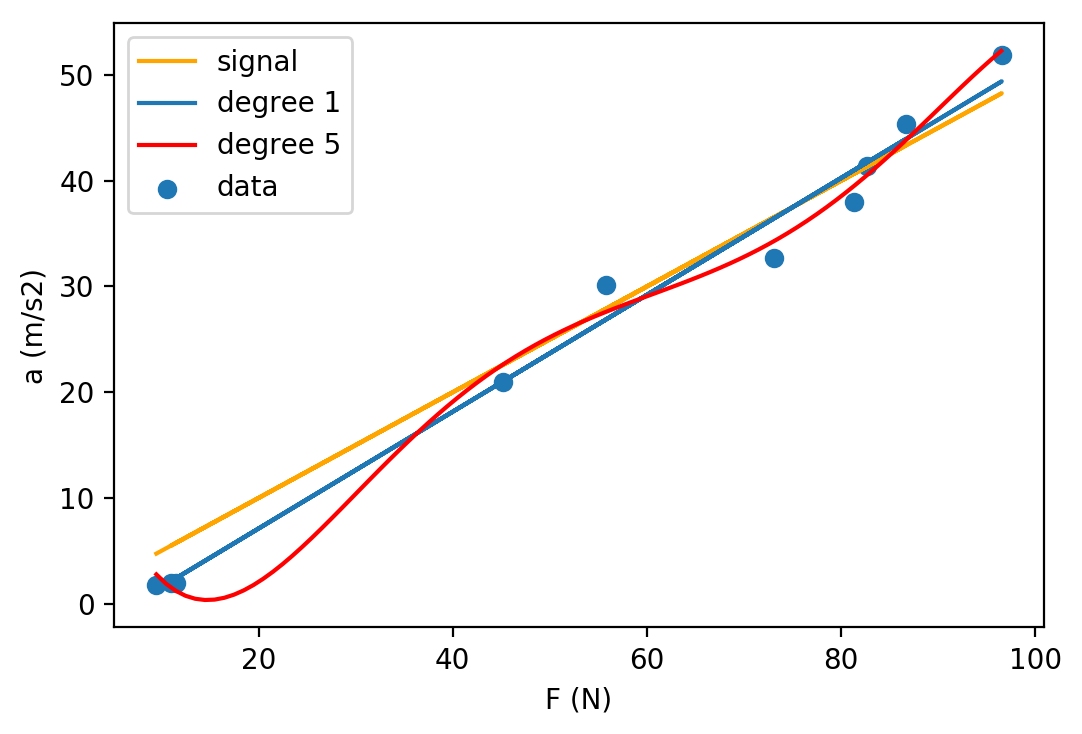

In [52]:
# Plot both fits
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='degree 1')

plt.plot(np.arange(min(F), max(F)), z(np.arange(min(F), max(F))), label='degree 5', color='red')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

In [53]:
# Generate new data
m = 2  # kg
F_new = np.random.rand(10, 1) * (max(F)-min(F)) + min(F)  # N
noise = np.random.rand(10, 1) * 10 - 5
a_new = F_new/m + noise  # m/s2

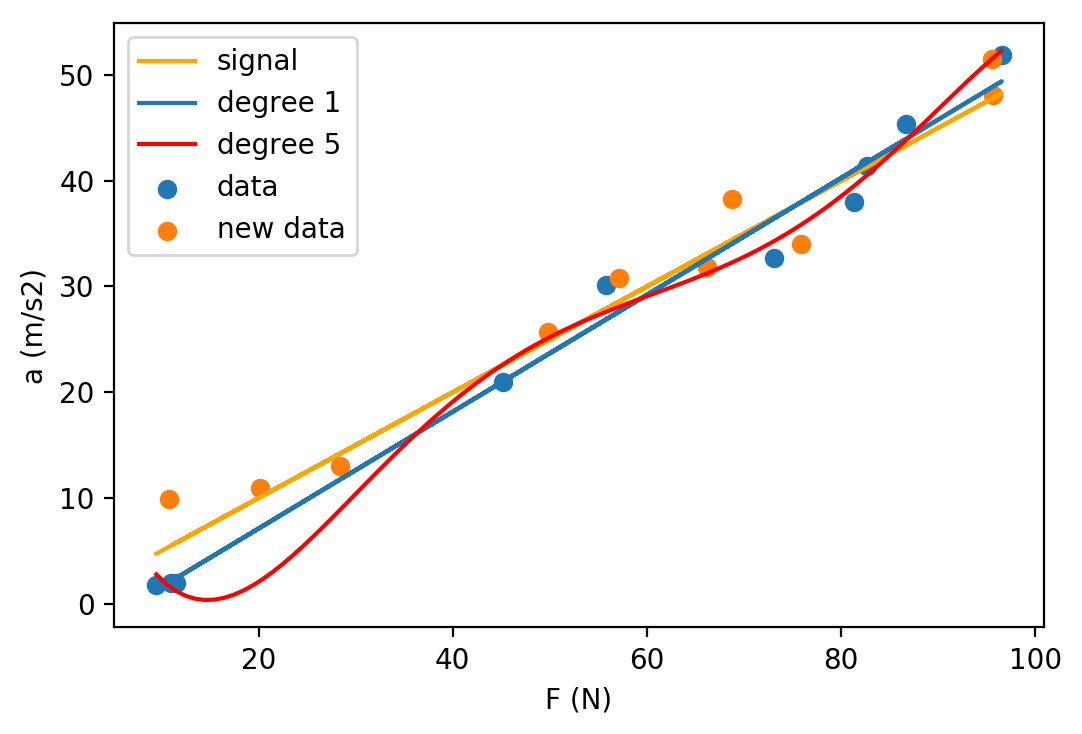

In [54]:
# Both fits on train and test data
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.scatter(F_new, a_new, label='new data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='degree 1')

plt.plot(np.arange(min(F), max(F)), z(np.arange(min(F), max(F))), label='degree 5', color='red')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

# Challenge 3

- Calculate training error for both fits
- Calculate test error for both fits
- Fit different degree polynomials and plot training and test errors wrt degree of the polynomial fit
- Generate data using a quartic signal, repeat previous step, and discover yourself what "underfitting" is.

## Solution

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def data_generator_deg4(num_of_data):
    np.random.seed(0) 
    x = np.random.rand(num_of_data, 1)*10 - 5
    noise = np.random.rand(num_of_data, 1)*30 - 15
    y = x**4 + 5*x**3 - x + noise
    return x, y, noise

In [57]:
def degree_vs_error_plotter():
    num_of_data = 15
    # Generate training data
    x_train, y_train, _ = data_generator_deg4(num_of_data)
    # Generate test data
    x_test, y_test, noise_te = data_generator_deg4(100)
    # Errors to be plotted
    tr_errors = []
    te_errors = []
    for degree_of_fit in np.arange(1, num_of_data):
        # fit training data
        z = np.poly1d(np.polyfit(x_train.reshape(-1), y_train.reshape(-1), degree_of_fit))
        # calculate tr error
        tr_preds = z(x_train)
        tr_error = np.mean(abs(tr_preds - y_train))
        tr_errors.append(tr_error)
        # calculate test error
        te_preds = z(x_test)
        te_error = np.mean(abs(te_preds - y_test))
        te_errors.append(te_error)

    # Plot errors
    plt.figure(dpi=200)
    plt.title('Fit degree vs. Error')
    plt.xlabel('Degree of the fit')
    plt.ylabel('MAE')
    plt.plot(tr_errors, label='Training error')
    plt.plot(te_errors, label='Test error')
    plt.ylim(0, max(tr_errors[0], te_errors[0]) + 10)
    # Plot aleatoric uncertainty
    alea_unc = np.mean(abs(noise_te))
    plt.plot([0, num_of_data], [alea_unc, alea_unc], ':', label='Aleatoric Uncertainty')
    # Plot sweet spot line
    plt.plot([4, 4], [0, max(tr_errors[0], te_errors[0]) + 10], '--', label='Sweet spot')
    # Indicate underfitting region
    plt.text(1, max(tr_errors[0], te_errors[0])-10, 'Underfitting', color='c')
    plt.arrow(4, max(tr_errors[0], te_errors[0])-20, -1, 0, head_width=5, head_length=0.5, color='c')
    # Indicate overfitting region
    plt.text(4.1, max(tr_errors[0], te_errors[0])-10, 'Overfitting', color='red')
    plt.arrow(4, max(tr_errors[0], te_errors[0])-20, 1, 0, head_width=5, head_length=0.5, color='red')
    plt.legend(bbox_to_anchor=(1, 1))

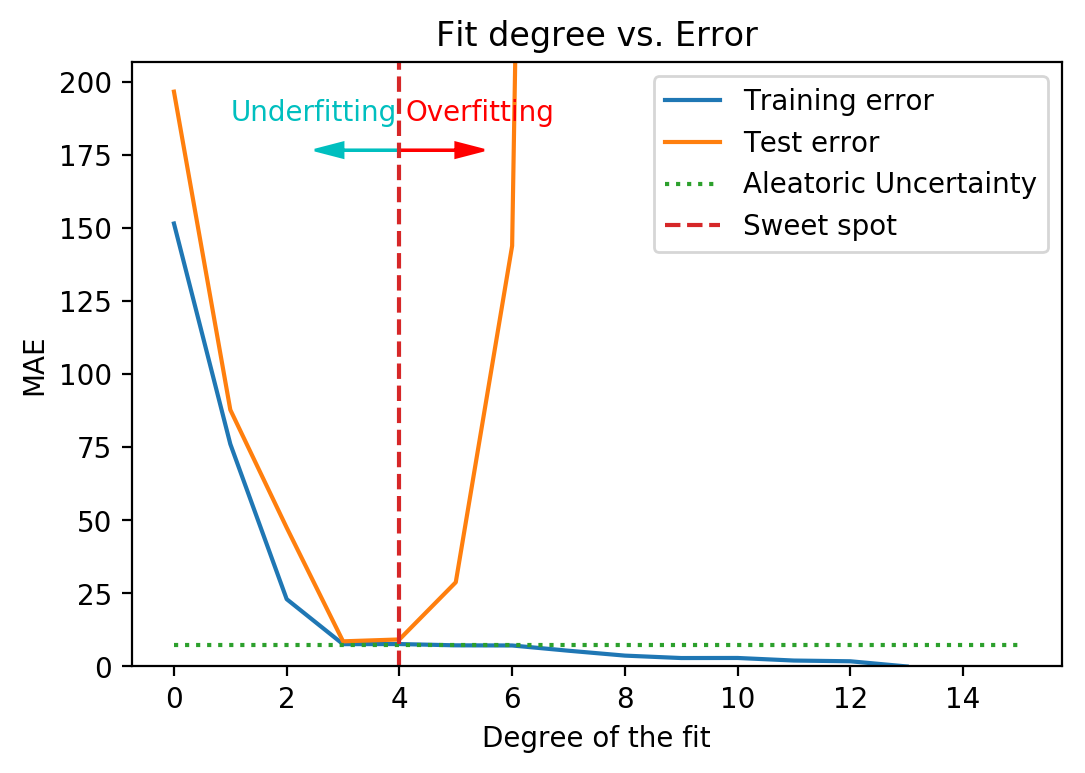

In [58]:
# Repeat a couple of times, data is generated randomly.
degree_vs_error_plotter()

Training error < Test error does not mean overfitting, it can happen when you underfit as well.

**Underfitting:** Model capacity is lower than signal, model cannot learn the signal.

**Overfitting:** Model capacity is higher than signal, model will learn the signal and the noise. It will fit the noise hence training performance will pass aleatoric uncertainty.

**Sweet spot:** Model has the capacity to learn the signal but not the noise

In practice, we do not know the signal. Still, we can detect over/under fitting by plotting figures similar to the one above. i.e. plotting training and testing errors wrt to hyper-parameter like the degree of fit, regularization, training time, number of NN layers etc.

When you are building models in practice its a good idea to first try overfitting and then regularization.

# Challenge 4 

Implement linear regression using gradient descent

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Generate data
# 1. Define m and n
m = 10  # number of examples
n = 1  # number of features

In [61]:
# 2. Generate X
X = np.random.uniform(size=(m, n))
X

array([[0.31179588],
       [0.69634349],
       [0.37775184],
       [0.17960368],
       [0.02467873],
       [0.06724963],
       [0.67939277],
       [0.45369684],
       [0.53657921],
       [0.89667129]])

In [62]:
# 3. Add 1's to X for the bias term for the dot product
X = np.concatenate((np.ones((m, 1)), X), axis=1)
X

array([[1.        , 0.31179588],
       [1.        , 0.69634349],
       [1.        , 0.37775184],
       [1.        , 0.17960368],
       [1.        , 0.02467873],
       [1.        , 0.06724963],
       [1.        , 0.67939277],
       [1.        , 0.45369684],
       [1.        , 0.53657921],
       [1.        , 0.89667129]])

In [63]:
# 4. Randomly generate parameters
theta_true = np.random.uniform(size=(n+1, 1))
theta_true

array([[0.99033895],
       [0.21689698]])

In [64]:
# 5. Calculate y
y = np.dot(X, theta_true)
y

array([[1.05796653],
       [1.14137375],
       [1.07227218],
       [1.02929444],
       [0.99569169],
       [1.00492519],
       [1.13769719],
       [1.08874442],
       [1.10672136],
       [1.18482425]])

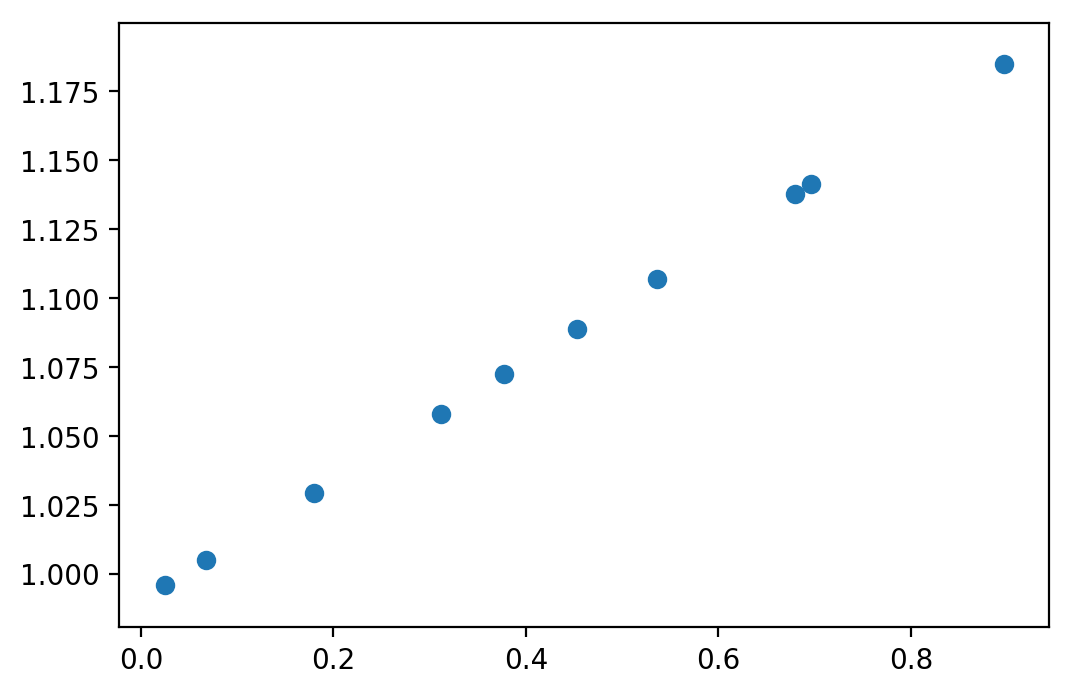

In [65]:
# 6. Plot the generated X and y
plt.figure(dpi=200)
plt.scatter(X[:, 1], y)

In [66]:
def plotter(X, y, theta):
    '''
    Arguments:
        n = 1
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
    Returns:
        None
        Plots X, y and the fit defined by theta
    '''
    plt.figure(dpi=200)
    plt.scatter(X[:, 1], y)
    linex = np.linspace(X[:, 1].min(), X[:, 1].max())
    liney = theta[0] + theta[1]*linex
    plt.plot(linex, liney)

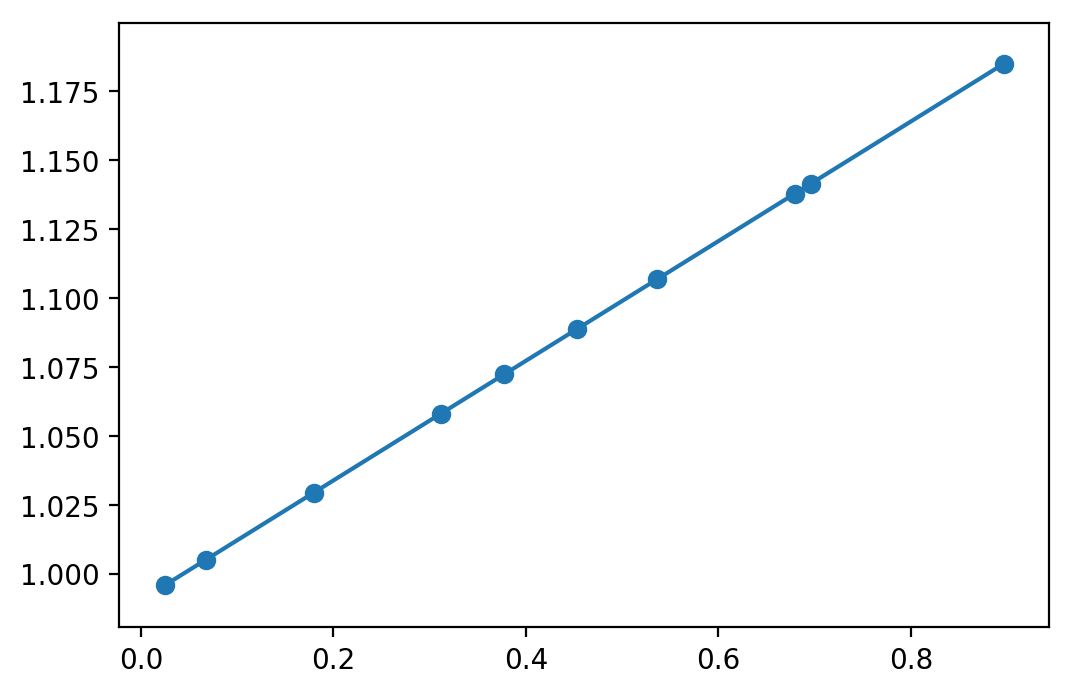

In [67]:
# 7. Plot the generated X and y, together with the signal used to generate them
plotter(X, y, theta_true)

## Solution

In [68]:
# Random weight initialization
theta = np.random.uniform(size=(n+1, 1))
theta

array([[0.6630782 ],
       [0.26332238]])

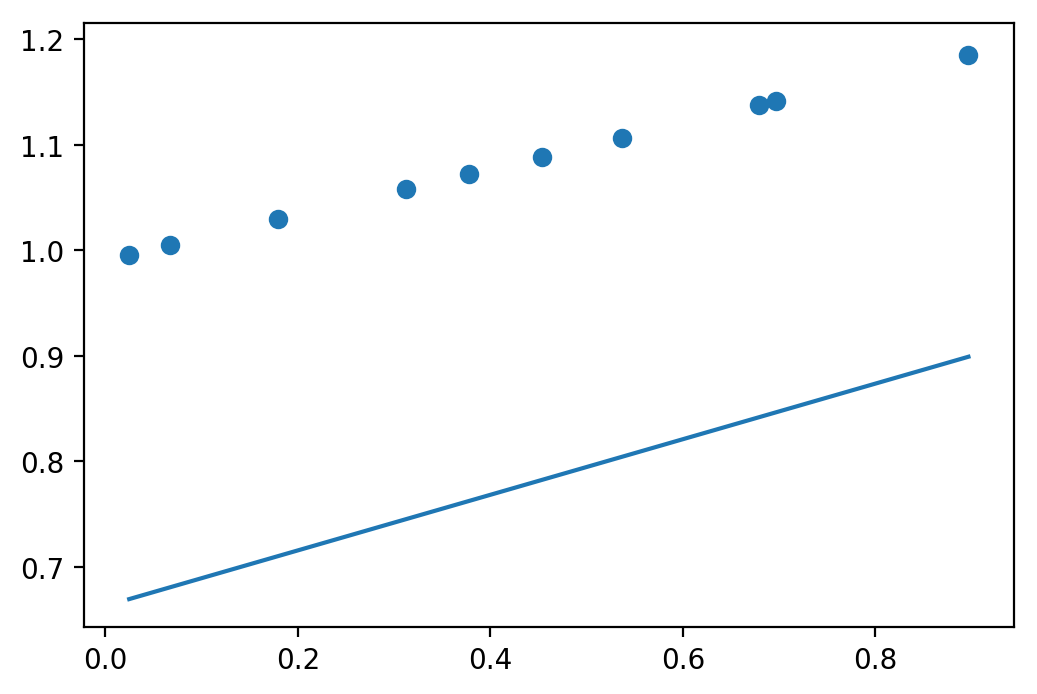

In [69]:
# X, y together with random fit
plotter(X, y, theta)

In [70]:
# Sub-challenge 1
def cost_function(X, y, theta):
    '''
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
    Returns:
        cost, a float.
    '''
    y_pred = np.dot(X, theta)
    cost = (0.5*m)*np.sum((y_pred-y)**2)
    return cost

In [71]:
# It should be a positive number
cost_function(X, y, theta)

4.740428246381324

In [72]:
# It should be zero
cost_function(X, y, theta_true)

0.0

In [73]:
# Sub-challenge 2
# Take the theta, update it using the GD rule
def GD_one_step(X, y, theta, lr):
    '''
    Updates theta using one gradient descent step.
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
        lr: learning rate, a float
    Returns:
        theta_new: np array with shape (1+n, 1), updated after one GD step
    '''
    y_pred = np.dot(X, theta)
    theta_new = np.zeros(theta.shape)
    for i in range(n+1):
        theta_new[i] = theta[i] - (lr/m)*np.sum((y_pred-y)*X[:, i].reshape(-1, 1))
    return theta_new

In [74]:
print('theta: ', theta.T)  # Theta before update
print('theta_true: ', theta_true.T)  # True theta
# It should be a positive number
cost_function(X, y, theta)

theta:  [[0.6630782  0.26332238]]
theta_true:  [[0.99033895 0.21689698]]


4.740428246381324

In [75]:
theta = GD_one_step(X, y, theta, lr=0.01)

In [76]:
print('theta: ', theta.T) # Theta after the first update
print('theta_true: ', theta_true.T)  # True theta
# It should be a positive number
cost_function(X, y, theta)

theta:  [[0.66615472 0.26458758]]
theta_true:  [[0.99033895 0.21689698]]


4.630428965259891

In [77]:
# Sub-challenge 3
# Repeat update
def GD(X, y, lr, epoch):
    '''
    Finds theta from X and y using gradient descent.
    Starts by random init. of theta
    Repeats GD_one_step for predefined number of epochs
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        lr: learning rate, a float
        epoch: an integer
    Returns:
        theta: np array with shape (1+n, 1), final theta after training
    '''
    theta = np.random.uniform(size=(n+1, 1))
    for i in range(epoch):
        theta = GD_one_step(X, y, theta, lr)
    return theta

In [78]:
# Linear regression with Gradient Descent
theta = GD(X, y, lr=0.01, epoch=10000)

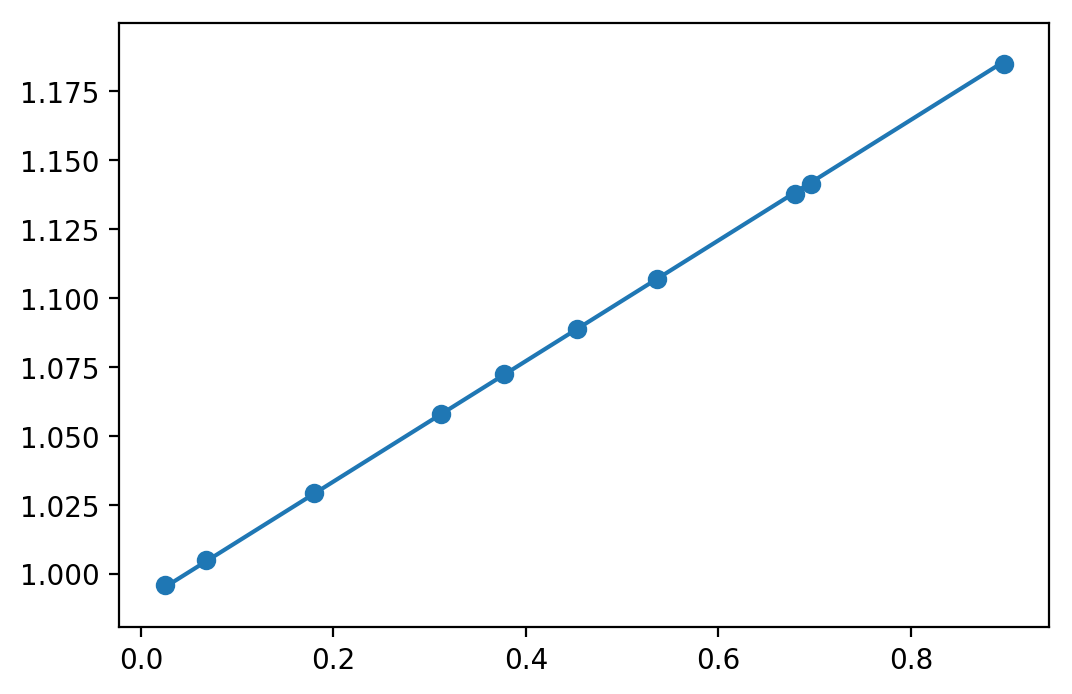

In [79]:
# Plot the learned theta
plotter(X, y, theta)

In [80]:
def plotter_multiple(X, y, theta, theta_true):
    '''
    For comparing the learned theta with the true theta
    Arguments:
        n = 1
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
        theta_true: np array with shape (1+n, 1)
    Returns:
        None
        Plots X, y, fit(theta), signal(theta_true)
    '''
    plt.figure(dpi=200)
    plt.scatter(X[:, 1], y)
    line_x = np.array([X[:, 1].min(), X[:, 1].max()])
    plt.plot(line_x, theta[0] + theta[1]*line_x, '--', label='fit')
    plt.plot(line_x, theta_true[0] + theta_true[1]*line_x, ':', label='signal')
    plt.legend()

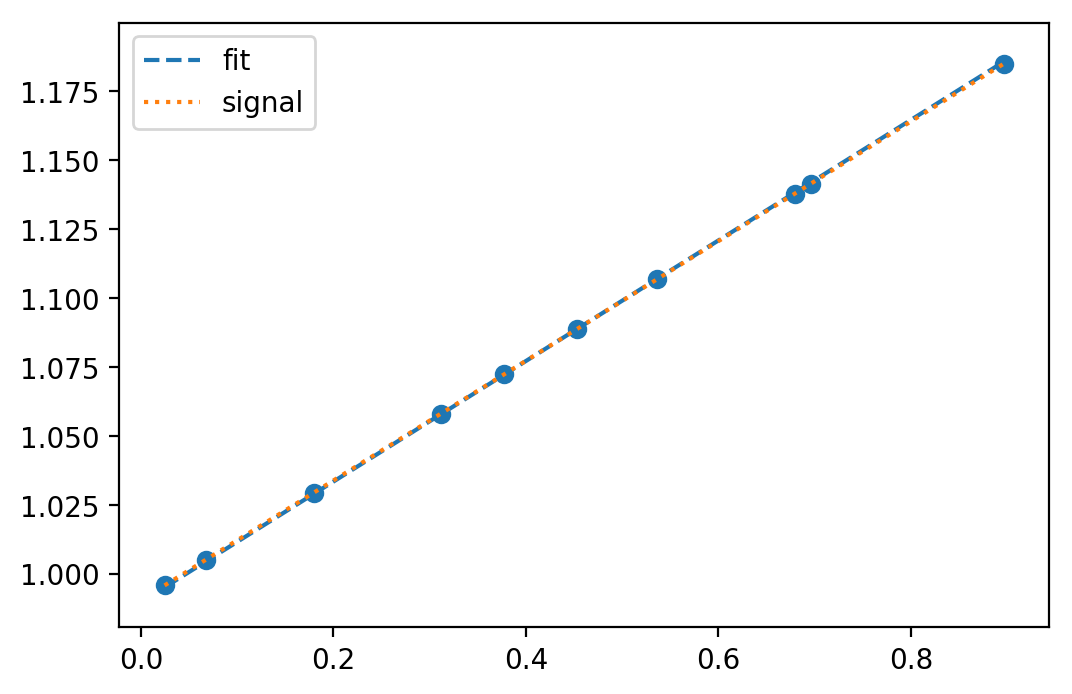

In [81]:
# Fit (learned theta) vs. Signal (true theta)
plotter_multiple(X, y, theta, theta_true)

In [82]:
# Sub-challenge 3 cont.
# Save loss at each epoch for plotting
def GD_memory(X, y, lr, epoch):
    '''
    Finds theta from X and y using gradient descent.
    Starts by random init. of theta
    Repeats GD_one_step for predefined number of epochs
    At each epoch calculates the loss and saves it into a list
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        lr: learning rate, a float
        epoch: an integer
    Returns:
        theta: np array with shape (1+n, 1), final theta after training
        memory: a list of floats, each item is loss at each epoch
    '''
    memory = []
    theta = np.random.uniform(size=(n+1, 1))
    for i in range(epoch):
        loss = cost_function(X, y, theta)
        memory.append(loss)
        theta = GD_one_step(X, y, theta, lr)
    return theta, memory

In [83]:
theta, memory = GD_memory(X, y, lr=0.01, epoch=1000)

In [84]:
def loss_plotter(memory):
    '''
    Plots the list of losses
    '''
    plt.figure(dpi=200)
    plt.plot(memory)
    plt.ylabel('loss')
    plt.xlabel('number of epochs')

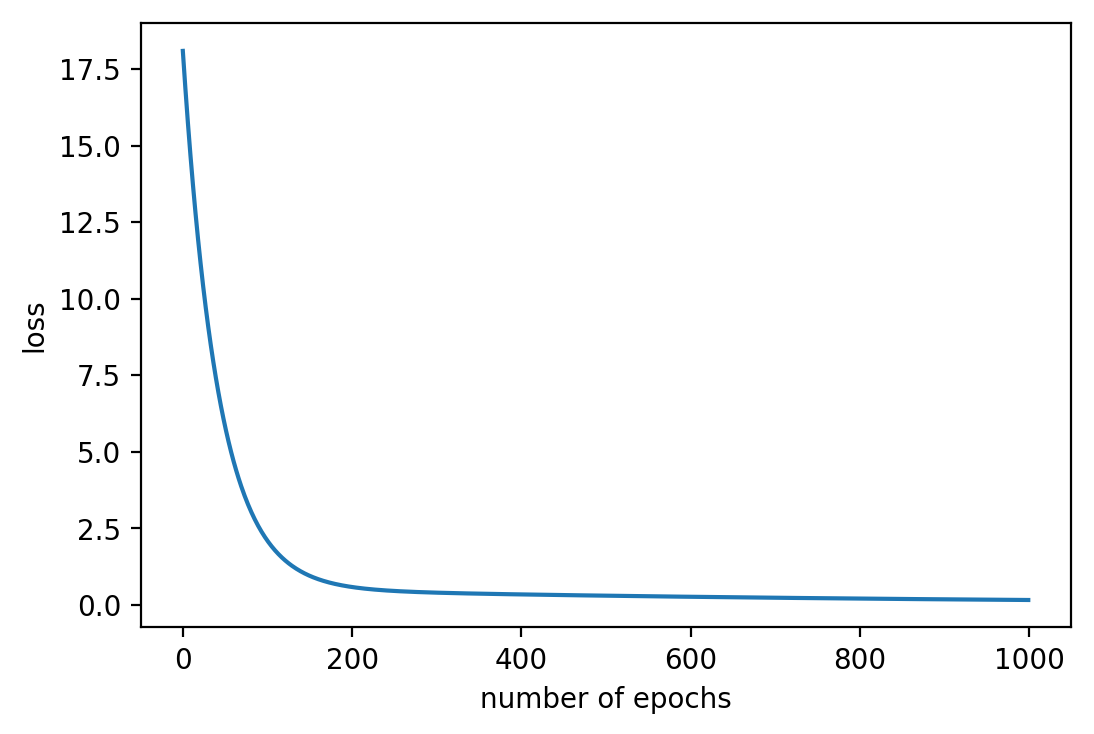

In [85]:
# Plot with differnt lr's
loss_plotter(memory)

## It should work with noisy data as well

In [86]:
# let's introduce noise
y_real = y * np.random.uniform(0.97, 1.03, m).reshape(-1, 1)

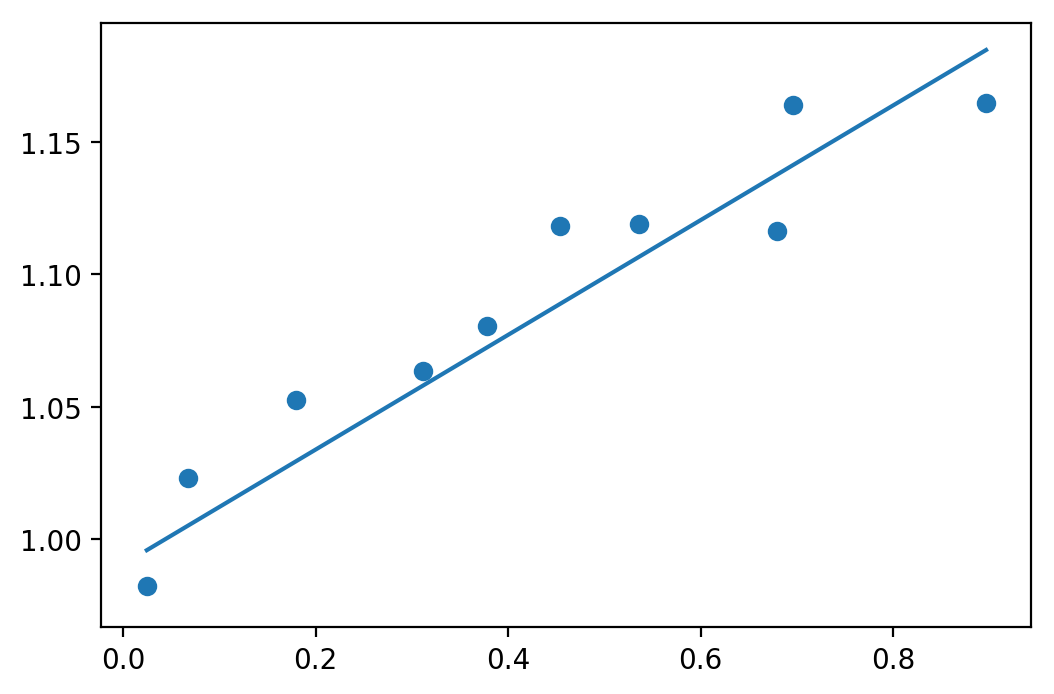

In [87]:
# Plot noisy X and y, with signal
plotter(X, y_real, theta_true)

In [88]:
theta, memory = GD_memory(X, y_real, lr=0.01, epoch=10000)

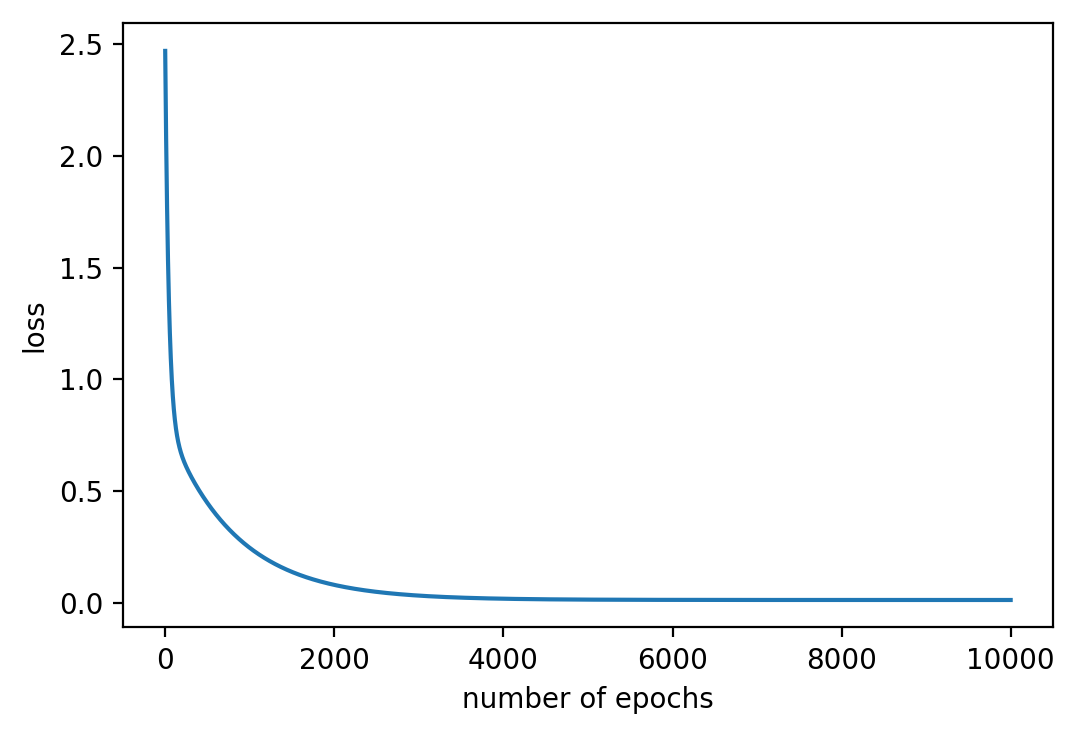

In [89]:
loss_plotter(memory)

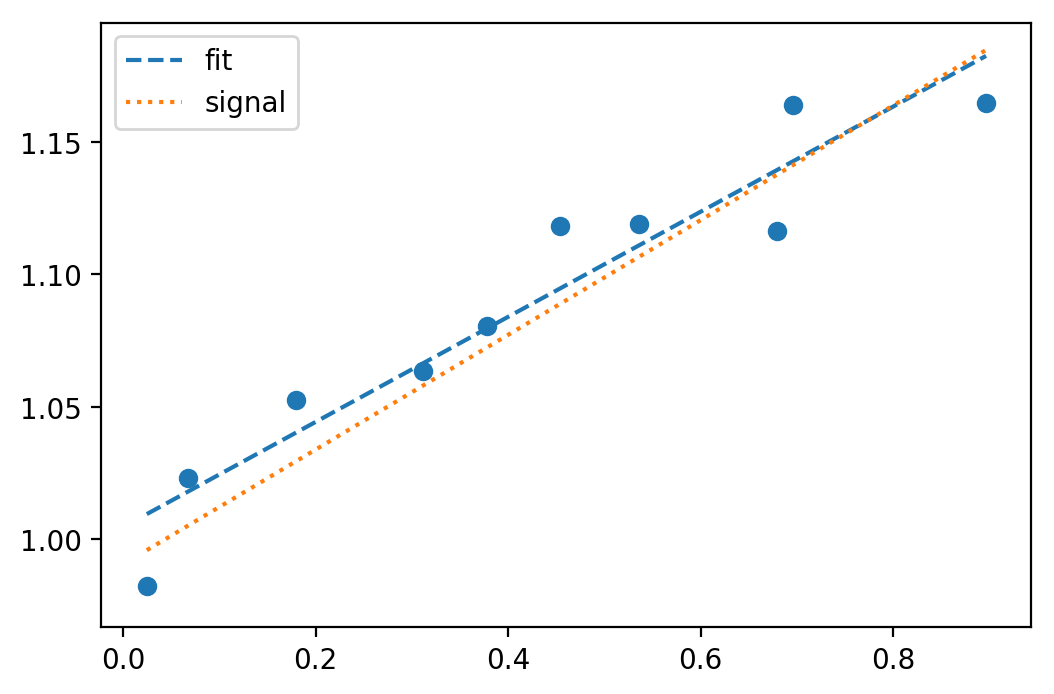

In [90]:
# Fit vs. Signal for noisy data
plotter_multiple(X, y_real, theta, theta_true)

## How about more features and noise

In [91]:
# Repeat data generation with more features + noise
m = 10  # number of examples
n = 2  # number of features

In [92]:
X = np.random.uniform(size=(m, n))
X

array([[0.25394164, 0.21331198],
       [0.51820071, 0.02566272],
       [0.20747008, 0.42468547],
       [0.37416998, 0.46357542],
       [0.27762871, 0.58678435],
       [0.86385561, 0.11753186],
       [0.51737911, 0.13206811],
       [0.71685968, 0.3960597 ],
       [0.56542131, 0.18327984],
       [0.14484776, 0.48805628]])

In [93]:
X = np.concatenate((np.ones((m, 1)), X), axis=1)
X

array([[1.        , 0.25394164, 0.21331198],
       [1.        , 0.51820071, 0.02566272],
       [1.        , 0.20747008, 0.42468547],
       [1.        , 0.37416998, 0.46357542],
       [1.        , 0.27762871, 0.58678435],
       [1.        , 0.86385561, 0.11753186],
       [1.        , 0.51737911, 0.13206811],
       [1.        , 0.71685968, 0.3960597 ],
       [1.        , 0.56542131, 0.18327984],
       [1.        , 0.14484776, 0.48805628]])

In [94]:
theta_true = np.random.uniform(size=(n+1, 1))
theta_true

array([[0.35561274],
       [0.94043195],
       [0.76532525]])

In [95]:
y = np.dot(X, theta_true)

In [96]:
# Add noise
y = y * np.random.uniform(0.97, 1.03, m).reshape(-1, 1)

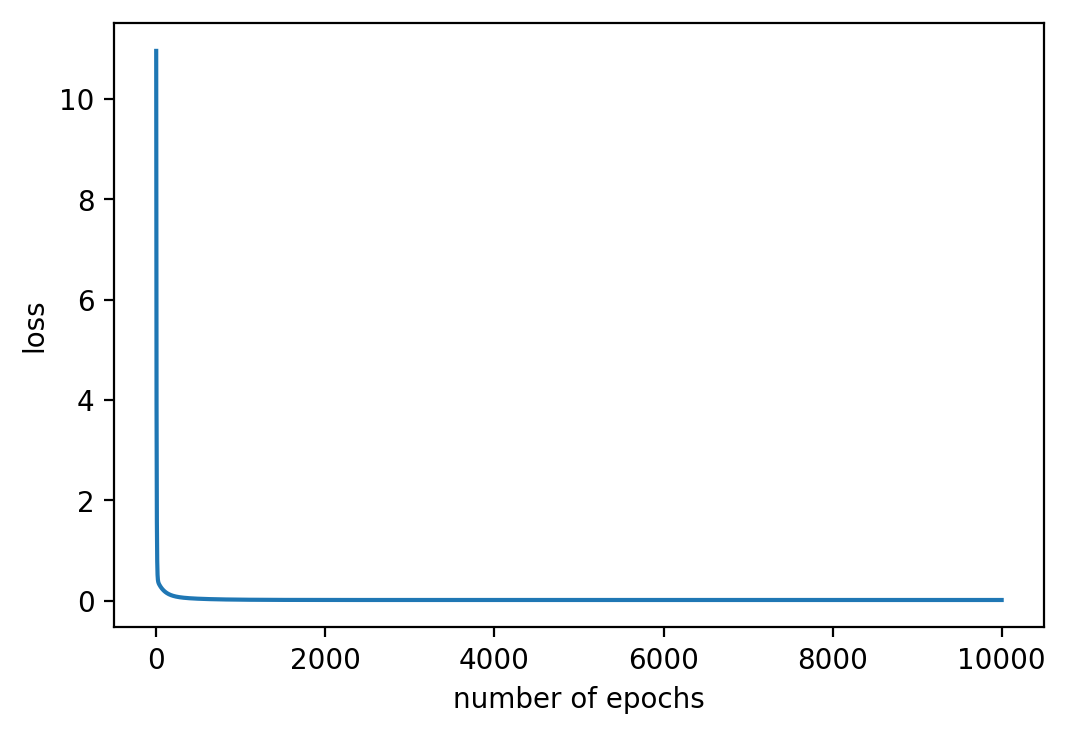

In [97]:
theta, memory = GD_memory(X, y, lr=0.1, epoch=10000)
loss_plotter(memory)

In [98]:
# Learned params vs. True params
print('theta: ', theta.T)
print('theta_true: ', theta_true.T)

theta:  [[0.35659588 0.95656355 0.72910304]]
theta_true:  [[0.35561274 0.94043195 0.76532525]]


In [99]:
# Prediction vs. Label
print('Prediction:', np.dot(X, theta)[0])
print('Ground truth:', y[0])

Prediction: [0.75503361]
Ground truth: [0.76898507]
